In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
data_dir = r'E:\datasets\MADE\3_graduation\parthplc\archive\data\\'

train_path = data_dir + 'train.jsonl'
dev_path = data_dir + 'dev.jsonl'

train_data = pd.read_json(train_path, lines=True)
test_data = pd.read_json(dev_path, lines=True)

In [3]:
test_data = test_data.sort_values('id')
test_data

,id,img,label,text
494,1268,img/01268.png,0,father and daughter bonding time is the best l...
159,1456,img/01456.png,1,they see them rollin..... they hating..
332,1726,img/01726.png,1,a real man loads the dishwasher every night
220,1742,img/01742.png,0,in just one hour from now i'll only have 4 hou...
217,1765,img/01765.png,1,"after a girl dies, what organ in her body stay..."
...,...,...,...,...
457,98235,img/98235.png,0,fashion forward !
412,98543,img/98543.png,1,upper downer
271,98547,img/98547.png,0,waves mexican flag doesn't want to live in mexico
164,98701,img/98701.png,1,oh no i can't steal anymore


In [4]:
predict = pd.read_csv(r'hateful_memes_run_val_2022-10-13T14_40_25.csv')
predict = predict.sort_values('id')
predict

,id,proba,label
494,1268,0.003496,0
159,1456,0.919679,1
332,1726,0.379014,0
220,1742,0.007269,0
217,1765,0.149833,0
...,...,...,...
457,98235,0.023379,0
412,98543,0.869906,1
271,98547,0.435612,0
164,98701,0.105086,0


In [5]:
prediction = predict['label'].values
predict_proba = predict['proba'].values


labels = test_data['label'].values

acc_score = accuracy_score(labels, prediction)
auc_score = roc_auc_score(labels, predict_proba)

print(acc_score, auc_score)

0.644 0.7360960000000001


0.7360960000000001


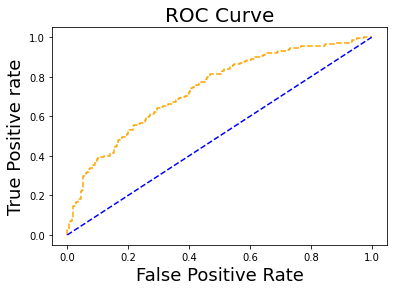

In [6]:
fpr, tpr, thresh = roc_curve(labels, predict_proba, pos_label=1)

random_probs = [0 for i in range(len(labels))]
p_fpr, p_tpr, _ = roc_curve(labels, random_probs, pos_label=1)
auc_score = roc_auc_score(labels, predict_proba)
print(auc_score)

plt.plot(fpr, tpr, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive rate',fontsize=18)

plt.show();